In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Insight: Essential libraries are imported for data manipulation, visualization, and machine learning metrics. pandas is used for data handling, matplotlib and seaborn for visualization, and numpy for numerical operations. Scikit-learn metrics are used to evaluate the performance of machine learning models.

In [2]:
df = pd.read_excel(r"C:\Users\HP\Downloads\python learning\collision_data2.xlsx")

#### Insight: The dataset is loaded from an Excel file into a DataFrame df. Ensure the file path is correct, and the dataset is accessible.

In [3]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

PERSON_TYPE             0.001734
PERSON_INJURY           0.001734
PERSON_AGE              0.432238
EJECTION               55.437874
EMOTIONAL_STATUS       44.976155
BODILY_INJURY          44.958380
POSITION_IN_VEHICLE    55.386283
SAFETY_EQUIPMENT       60.929507
COMPLAINT              44.952311
PED_ROLE               44.952311
PERSON_SEX             44.987427
COMPLAINT_category      0.000000
dtype: float64


#### Insight: This step calculates the percentage of missing values in each column, which is crucial for understanding data quality and deciding on data cleaning strategies.

In [4]:
import pandas as pd

# assume 'df' is your dataset
df = df.replace('Unknown', np.nan)
df = df.dropna()

#### Insight: 'Unknown' values are replaced with NaN, and rows with any missing values are dropped from the DataFrame. This can help improve the quality of the dataset but may also result in a loss of data.

In [8]:
import pandas as pd

# assume 'df' is your dataset and 'column_name' is the column you want to check
index_names = df[df['PERSON_SEX'] == 'U'].index
df.drop(index_names, inplace=True)

#### Insight: Rows where the PERSON_SEX column has the value 'U' are removed from the DataFrame. This can help in refining the dataset further.


In [6]:
import pandas as pd

# assume 'df' is your dataset and 'column_name' is the column you want to check
index_names = df[df['SAFETY_EQUIPMENT'] == '-'].index
df.drop(index_names, inplace=True)

#### Insight: Similar to the previous step, rows with '-' in the SAFETY_EQUIPMENT column are removed to clean the data.

In [9]:
import pandas as pd

# assume 'df' is your dataset
num_records = df.shape[0]
print(f"Number of records: {num_records}")

Number of records: 67995


#### Insight: This step outputs the total number of records (rows) remaining in the DataFrame after the cleaning steps.

In [10]:
df.head()

,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,COMPLAINT_category
0,Occupant,Injured,27.0,Not Ejected,Conscious,Back,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,M,Minor Complaint
4,Occupant,Injured,50.0,Not Ejected,Conscious,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Complaint of Pain or Nausea,Passenger,F,Minor Complaint
5,Occupant,Injured,36.0,Not Ejected,Conscious,Back,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Complaint of Pain or Nausea,Passenger,M,Minor Complaint
6,Occupant,Injured,3.0,Not Ejected,Conscious,Head,"Middle rear seat, or passenger lying across a ...",Child Restraint Only,Whiplash,Passenger,M,Moderate Complaint
8,Occupant,Injured,32.0,Not Ejected,Conscious,Head,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,M,Minor Complaint


#### Insight: Displays the first few rows of the DataFrame to get an initial look at the data structure and contents.


In [12]:
df.tail()

,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,COMPLAINT_category
230643,Occupant,Injured,42.0,Not Ejected,Conscious,Neck,"Middle front seat, or passenger lying across a...",Air Bag Deployed/Lap Belt/Harness,Complaint of Pain,Passenger,F,Minor Complaint
230648,Occupant,Injured,51.0,Not Ejected,Conscious,Head,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,F,Minor Complaint
230649,Occupant,Injured,77.0,Not Ejected,Conscious,Neck,Driver,Lap Belt,Whiplash,Driver,M,Moderate Complaint
230651,Occupant,Injured,32.0,Not Ejected,Conscious,Back,"Front passenger, if two or more persons, inclu...",Lap Belt,Complaint of Pain,Passenger,F,Minor Complaint
230655,Occupant,Injured,56.0,Not Ejected,Conscious,Back,"Left rear passenger, or rear passenger on a bi...",Lap Belt & Harness,Complaint of Pain or Nausea,Passenger,F,Minor Complaint


#### Insight: Displays the last few rows of the DataFrame to ensure the data integrity after cleaning.

In [94]:
df.tail()

,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX,COMPLAINT_category
230643,1,0,42.0,2,1,11,6,3,2,3,0,0
230648,1,0,51.0,2,1,8,2,10,3,0,0,0
230649,1,0,77.0,2,1,11,2,9,19,0,1,1
230651,1,0,32.0,2,1,1,3,9,2,3,0,0
230655,1,0,56.0,2,1,1,5,10,3,3,0,0


### Breif about model creation

In [62]:
### Step1 : Import necessary libraries for data manipulation (pandas), preprocessing (LabelEncoder, StandardScaler), model training (train_test_split, GridSearchCV, LogisticRegression, DecisionTreeClassifier), evaluation (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report), and plotting (matplotlib).

### Step2 : Label Encoding for Categorical Variables
####Insight: Convert categorical variables into numerical values using LabelEncoder to prepare them for machine learning models.

###Step3 : Defining Features and Target Variable 
####Insight: Define the target variable (PERSON_INJURY) and features (COMPLAINT_category, EMOTIONAL_STATUS, SAFETY_EQUIPMENT) used for prediction.

###Step4 : Splitting the Dataset
####Insight: Split the dataset into training (80%) and testing (20%) sets to evaluate model performance.

###Step5 : Feature Scaling
####Insight: Standardize the feature values to have a mean of 0 and a standard deviation of 1. This step can improve model performance by ensuring that all features contribute equally to the model.

###Step6 : Logistic Regression Model with GridSearchCV
####Insight: Use GridSearchCV to find the best hyperparameters (C values) for the Logistic Regression model. The roc_auc scoring is used for evaluating the model during cross-validation.

###Step7. Decision Tree Model with GridSearchCV
####Insight: Similarly, use GridSearchCV to find the best hyperparameters (max_depth, min_samples_split, min_samples_leaf) for the Decision Tree model.

###Step8 : Model Evaluation
####Insight: Evaluate both models using metrics like accuracy, precision, recall, F1-score, and ROC-AUC. Print the best parameters found by GridSearchCV and the classification report.

###Step9 : Plotting ROC Curves
####Insight: Plot ROC curves for both models to visualize their performance. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) provides a single measure of the model's ability to discriminate between positive and negative classes.

### Model creation using Logistic regression and Decision tree classifier

#### Iteration 1

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

Logistic Regression Model:
Best Parameters: {'C': 0.1}
Accuracy: 0.9988234429002133
Precision: 0.9976482700870356
Recall: 0.9988234429002133
F1-score: 0.9982355106256786
ROC-AUC: 0.9152134101450343
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.00      0.00      0.00        16

    accuracy                           1.00     13599
   macro avg       0.50      0.50      0.50     13599
weighted avg       1.00      1.00      1.00     13599


Decision Tree Model:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.9996323259063167
Precision: 0.9996225375038402
Recall: 0.9996323259063167
F1-score: 0.999626402445924
ROC-AUC: 0.9359056357211221
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.87      0.81      0.84        16

    accuracy      

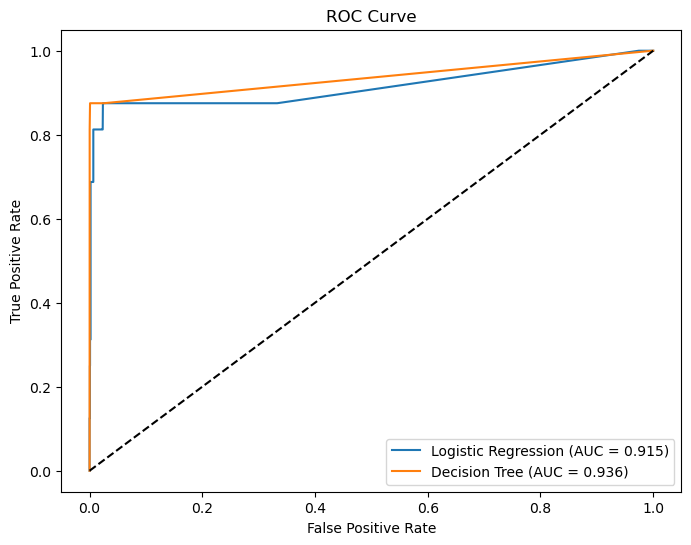

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


# Label Encoding for categorical variables
le = LabelEncoder()
for col in ['PERSON_TYPE',"COMPLAINT_category", 'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX']:
    df[col] = le.fit_transform(df[col])

Accident_Severity = 'PERSON_INJURY'   
features = ["COMPLAINT_category",'EMOTIONAL_STATUS', 'SAFETY_EQUIPMENT']   
    
# Split the dataset into training and testing sets
X = df[features]
y = df[Accident_Severity]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model with GridSearchCV
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

# Decision Tree Model with GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
dt_cv.fit(X_train, y_train)

# Model Evaluation
y_pred_log_reg = log_reg_cv.predict(X_test)
y_pred_dt = dt_cv.predict(X_test)

report_logreg = classification_report(y_test, y_pred_log_reg)
report_dtree = classification_report(y_test, y_pred_dt)

print("Logistic Regression Model:")
print("Best Parameters:", log_reg_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_logreg)

print("\nDecision Tree Model:")
print("Best Parameters:", dt_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_dtree)

# Plot ROC curve for both models
y_pred_log_reg_prob = log_reg_cv.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_cv.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.3f})'.format(auc_log_reg))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Iteration 2

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

Logistic Regression Model:
Best Parameters: {'C': 100}
Accuracy: 0.9988234429002133
Precision: 0.9976482700870356
Recall: 0.9988234429002133
F1-score: 0.9982355106256786
ROC-AUC: 0.9179742140911433
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.00      0.00      0.00        16

    accuracy                           1.00     13599
   macro avg       0.50      0.50      0.50     13599
weighted avg       1.00      1.00      1.00     13599


Decision Tree Model:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.9996323259063167
Precision: 0.9996225375038402
Recall: 0.9996323259063167
F1-score: 0.999626402445924
ROC-AUC: 0.9553416955017302
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.87      0.81      0.84        16

    accuracy      

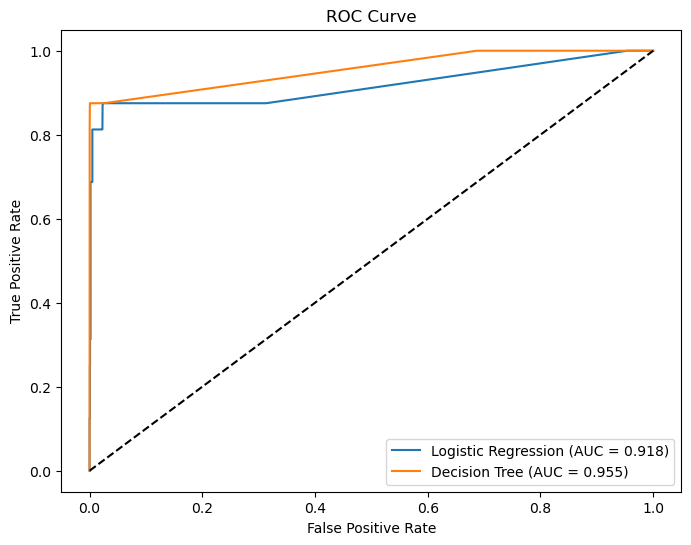

In [21]:


Accident_Severity = 'PERSON_INJURY'   
features = ["COMPLAINT_category",'EMOTIONAL_STATUS', 'SAFETY_EQUIPMENT','PERSON_TYPE']   
    
# Split the dataset into training and testing sets
X = df[features]
y = df[Accident_Severity]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model with GridSearchCV
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

# Decision Tree Model with GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
dt_cv.fit(X_train, y_train)

# Model Evaluation
y_pred_log_reg = log_reg_cv.predict(X_test)
y_pred_dt = dt_cv.predict(X_test)

report_logreg = classification_report(y_test, y_pred_log_reg)
report_dtree = classification_report(y_test, y_pred_dt)

print("Logistic Regression Model:")
print("Best Parameters:", log_reg_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_logreg)

print("\nDecision Tree Model:")
print("Best Parameters:", dt_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_dtree)

# Plot ROC curve for both models
y_pred_log_reg_prob = log_reg_cv.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_cv.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.3f})'.format(auc_log_reg))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Iteration 3

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

Logistic Regression Model:
Best Parameters: {'C': 0.1}
Accuracy: 0.9988234429002133
Precision: 0.9976482700870356
Recall: 0.9988234429002133
F1-score: 0.9982355106256786
ROC-AUC: 0.9162694176544209
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.00      0.00      0.00        16

    accuracy                           1.00     13599
   macro avg       0.50      0.50      0.50     13599
weighted avg       1.00      1.00      1.00     13599


Decision Tree Model:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 0.9996323259063167
Precision: 0.9996225375038402
Recall: 0.9996323259063167
F1-score: 0.999626402445924
ROC-AUC: 0.9553762055510566
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.87      0.81      0.84        16

    accuracy     

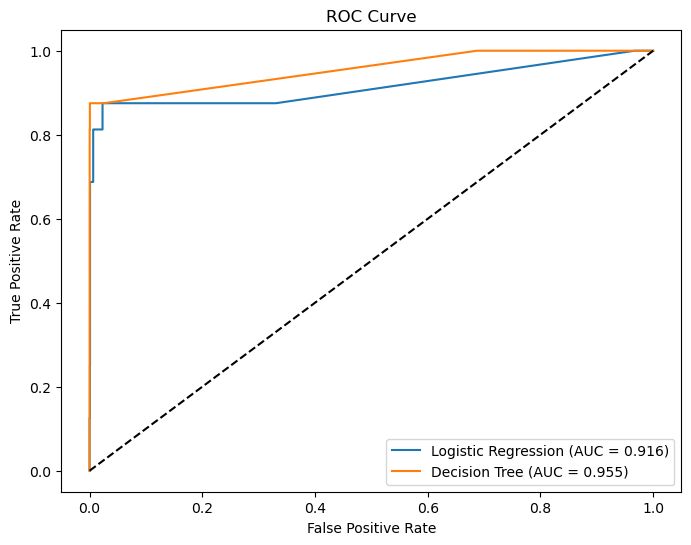

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# assume 'df' is your dataset

# Label Encoding for categorical variables
le = LabelEncoder()
for col in ['PERSON_TYPE',"COMPLAINT_category", 'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX']:
    df[col] = le.fit_transform(df[col])

Accident_Severity = 'PERSON_INJURY'   
features = ["COMPLAINT_category",'EMOTIONAL_STATUS', 'SAFETY_EQUIPMENT','PERSON_TYPE','EJECTION']   
    
# Split the dataset into training and testing sets
X = df[features]
y = df[Accident_Severity]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model with GridSearchCV
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

# Decision Tree Model with GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
dt_cv.fit(X_train, y_train)

# Model Evaluation
y_pred_log_reg = log_reg_cv.predict(X_test)
y_pred_dt = dt_cv.predict(X_test)

report_logreg = classification_report(y_test, y_pred_log_reg)
report_dtree = classification_report(y_test, y_pred_dt)

print("Logistic Regression Model:")
print("Best Parameters:", log_reg_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_logreg)

print("\nDecision Tree Model:")
print("Best Parameters:", dt_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_dtree)

# Plot ROC curve for both models
y_pred_log_reg_prob = log_reg_cv.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_cv.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.3f})'.format(auc_log_reg))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Iteration 4

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

Logistic Regression Model:
Best Parameters: {'C': 0.1}
Accuracy: 0.9988234429002133
Precision: 0.9976482700870356
Recall: 0.9988234429002133
F1-score: 0.9982355106256786
ROC-AUC: 0.9266362364720607
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.00      0.00      0.00        16

    accuracy                           1.00     13599
   macro avg       0.50      0.50      0.50     13599
weighted avg       1.00      1.00      1.00     13599


Decision Tree Model:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9996323259063167
Precision: 0.9996225375038402
Recall: 0.9996323259063167
F1-score: 0.999626402445924
ROC-AUC: 0.9578517264227342
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.87      0.81      0.84        16

    accuracy      

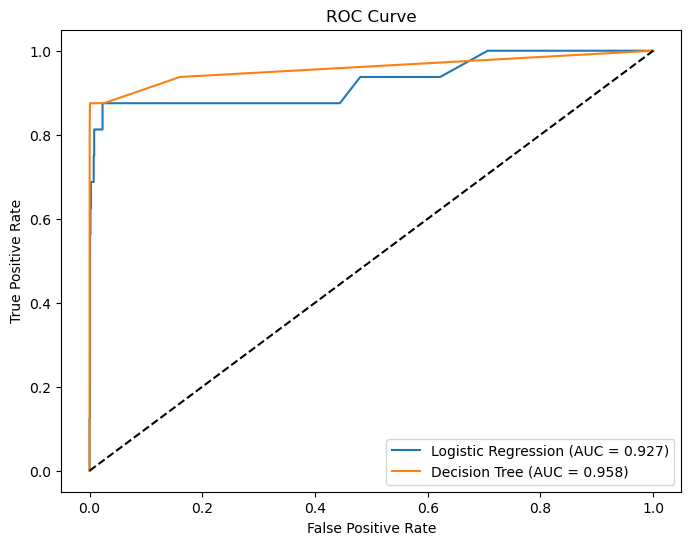

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# assume 'df' is your dataset

# Label Encoding for categorical variables
le = LabelEncoder()
for col in ['PERSON_TYPE',"COMPLAINT_category", 'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX']:
    df[col] = le.fit_transform(df[col])

Accident_Severity = 'PERSON_INJURY'   
features = ["COMPLAINT_category",'EMOTIONAL_STATUS', 'SAFETY_EQUIPMENT','PERSON_TYPE','EJECTION', 'BODILY_INJURY', 'POSITION_IN_VEHICLE']   
    
# Split the dataset into training and testing sets
X = df[features]
y = df[Accident_Severity]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model with GridSearchCV
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

# Decision Tree Model with GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
dt_cv.fit(X_train, y_train)

# Model Evaluation
y_pred_log_reg = log_reg_cv.predict(X_test)
y_pred_dt = dt_cv.predict(X_test)

report_logreg = classification_report(y_test, y_pred_log_reg)
report_dtree = classification_report(y_test, y_pred_dt)

print("Logistic Regression Model:")
print("Best Parameters:", log_reg_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_logreg)

print("\nDecision Tree Model:")
print("Best Parameters:", dt_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_dtree)

# Plot ROC curve for both models
y_pred_log_reg_prob = log_reg_cv.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_cv.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.3f})'.format(auc_log_reg))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Iteration 5

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classif

Logistic Regression Model:
Best Parameters: {'C': 0.1}
Accuracy: 0.9988234429002133
Precision: 0.9976482700870356
Recall: 0.9988234429002133
F1-score: 0.9982355106256786
ROC-AUC: 0.9152134101450343
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.00      0.00      0.00        16

    accuracy                           1.00     13599
   macro avg       0.50      0.50      0.50     13599
weighted avg       1.00      1.00      1.00     13599


Decision Tree Model:
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.9996323259063167
Precision: 0.9996225375038402
Recall: 0.9996323259063167
F1-score: 0.999626402445924
ROC-AUC: 0.9359056357211221
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.87      0.81      0.84        16

    accuracy      

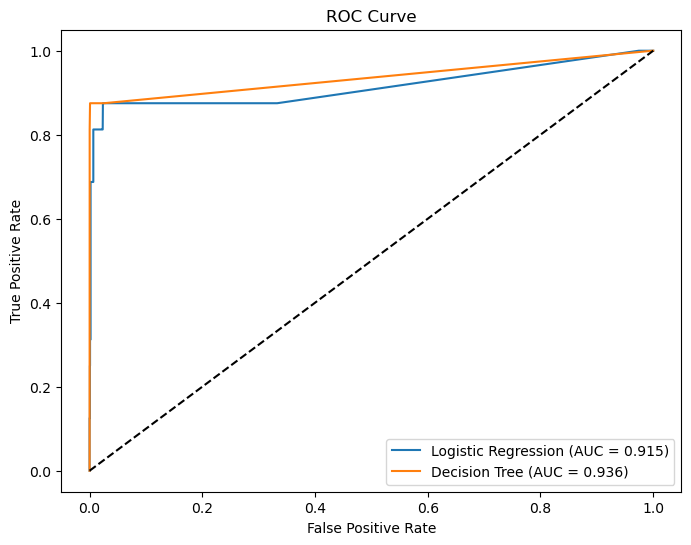

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# assume 'df' is your dataset

# Label Encoding for categorical variables
le = LabelEncoder()
for col in ['PERSON_TYPE',"COMPLAINT_category", 'PERSON_INJURY', 'EJECTION', 'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE', 'SAFETY_EQUIPMENT', 'COMPLAINT', 'PED_ROLE', 'PERSON_SEX']:
    df[col] = le.fit_transform(df[col])

Accident_Severity = 'PERSON_INJURY'   
features = ["COMPLAINT_category",'EMOTIONAL_STATUS', 'SAFETY_EQUIPMENT']   
    
# Split the dataset into training and testing sets
X = df[features]
y = df[Accident_Severity]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model with GridSearchCV
log_reg = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train, y_train)

# Decision Tree Model with GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')
dt_cv.fit(X_train, y_train)

# Model Evaluation
y_pred_log_reg = log_reg_cv.predict(X_test)
y_pred_dt = dt_cv.predict(X_test)

report_logreg = classification_report(y_test, y_pred_log_reg)
report_dtree = classification_report(y_test, y_pred_dt)

print("Logistic Regression Model:")
print("Best Parameters:", log_reg_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_logreg)

print("\nDecision Tree Model:")
print("Best Parameters:", dt_cv.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt_cv.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", report_dtree)

# Plot ROC curve for both models
y_pred_log_reg_prob = log_reg_cv.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt_cv.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.3f})'.format(auc_log_reg))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Best model iteration

Logistic Regression Model with L2 Regularization:
Accuracy: 0.9989705125376865
Precision: 0.9989715725380155
Recall: 0.9989705125376865
F1-score: 0.998570421438922
ROC-AUC: 0.9152272141647648
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       1.00      0.12      0.22        16

    accuracy                           1.00     13599
   macro avg       1.00      0.56      0.61     13599
weighted avg       1.00      1.00      1.00     13599


Decision Tree Model:
Accuracy: 0.9996323259063167
Precision: 0.9996225375038402
Recall: 0.9996323259063167
F1-score: 0.999626402445924
ROC-AUC: 0.9553416955017302
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13583
           1       0.87      0.81      0.84        16

    accuracy                           1.00     13599
   macro avg       0.93      0.91      0.92     135

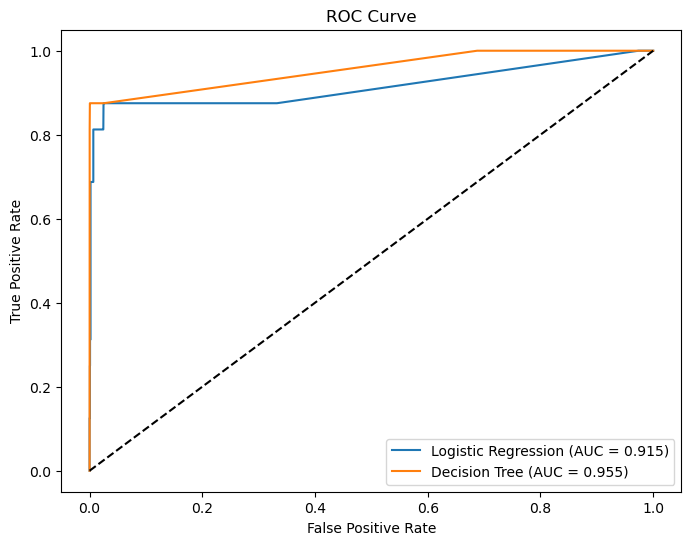

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset and it has been preprocessed accordingly
Accident_Severity = 'PERSON_INJURY'   
features = ["COMPLAINT_category", 'EMOTIONAL_STATUS', 'SAFETY_EQUIPMENT']   
    
# Split the dataset into training and testing sets
X = df[features]
y = df[Accident_Severity]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with L2 Regularization
log_reg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)

# Model Evaluation - Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Model with L2 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Model Evaluation - Decision Tree
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot ROC curve for both models
y_pred_log_reg_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_dt_prob = dt.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)

auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.3f})'.format(auc_log_reg))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.3f})'.format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')  # random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
